In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib.ticker import MaxNLocator

In [221]:
sns.set_theme(context='notebook', font_scale=1.2)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica Neue']
plt.rcParams['font.weight'] = 'light'
plt.rcParams['font.stretch'] = 'condensed'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 2

In [222]:
df = pd.read_csv('survey_responses.csv',
                names = ['timestamp',
                        'intro',
                        'occupation', # background
                        'research_area', # background
                        'progress_impossible',
                        'progress_slower',
                        'reading', # background
                        'influence_on_work',
                        'paper_titles',
                        'use_of_concepts',
                        'importance',
                        'importance_multilingual_low_res',
                        'importance_multimodal_grounding',
                        'importance_engineering',
                        'importance_factuality_reasoning',
                        'importance_society_bias',
                        'additional_thoughts',
                        'whats_missing',
                        'why_not_important',
                        'name_for_acks'], header=0)

df['reading'] = df['reading'].replace({
    'Most of the works I read are about model analysis and interpretability': 5,
    'I read model analysis and interpretability work more than other NLP topics': 4,
    'I read model analysis and interpretability work in about the same volume as other NLP-related topics': 3,
    'I do read some model analysis and interpretability work, but much less than other topics': 2,
    "I don't usually read model analysis and interpretability work, but I do read NLP works about other topics": 1})

df['research_area'] = df['research_area'].str.split(':', expand=True)[0]

df['use_of_concepts'] = df['use_of_concepts'].replace({'Always': 5,
 'Often': 4,
 'Sometimes': 3,
 'Rarely': 2,
 'Never': 1})

/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_99048/2210394213.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['reading'] = df['reading'].replace({
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_99048/2210394213.py:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['use_of_concepts'] = df['use_of_concepts'].replace({'Always': 5,


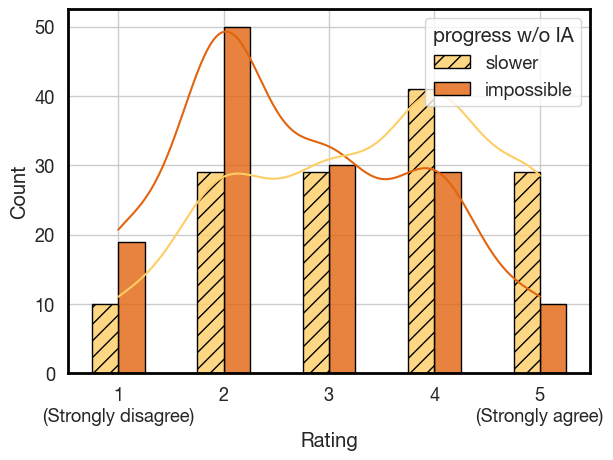

In [248]:
# plt.figure(figsize=(8,6))
progress_df = df.melt(value_vars=['progress_slower', 'progress_impossible'])
progress_df['progress'] = progress_df['variable'].str.split('progress_', expand=True)[1]
ax = sns.histplot(progress_df,
                  x='value',
                  hue='progress',
                  multiple='dodge',
                  kde=True,
                  discrete=True,
                  palette='YlOrBr',
                  alpha=0.8,
                  shrink=0.5,
                 edgecolor='black')

hatches = ['', '//']
for container, hatch, handle in zip(ax.containers, hatches, ax.get_legend().legend_handles[::-1]):
    handle.set_hatch(hatch)
    for rectangle in container:
        rectangle.set_hatch(hatch)

sns.move_legend(
    ax, "upper right",
    bbox_to_anchor=(1, 1), title='progress w/o IA', 
)
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.linewidth'] = 2

plt.tight_layout()
plt.xlabel('Rating')
plt.xticks([1,2,3,4,5], ['1\n(Strongly disagree)', '2', '3', '4', '5\n(Strongly agree)'])
# plt.show()
plt.savefig('slower_impossible.pdf')

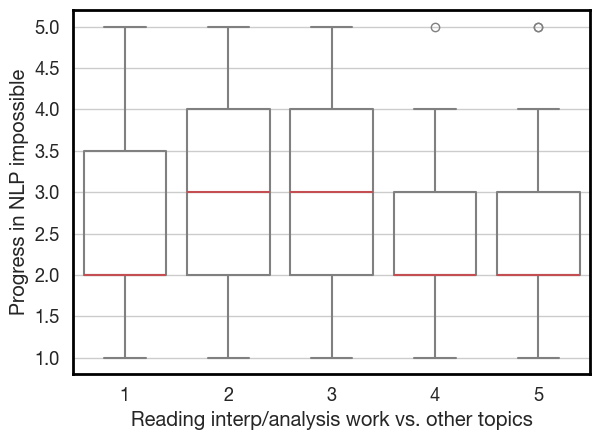

In [224]:
sns.boxplot(df, x='reading', y='progress_impossible',
            fill=False,
            medianprops={"color": "r"},color='grey')
# sns.stripplot(df, x='reading', y='progress_slower',
#               dodge=True,
#               jitter=True, alpha=0.8)
# plt.show()
plt.xlabel('Reading interp/analysis work vs. other topics')
plt.ylabel('Progress in NLP impossible')
# plt.xticks([1,2,3,4,5], ['1\n(Strongly disagree)', '2', '3', '4', '5\n(Strongly agree)']) # FIX
plt.tight_layout()
plt.savefig('progress_imposs_reading.pdf')

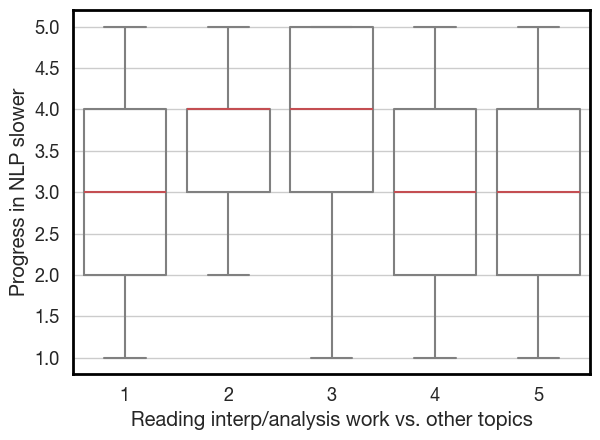

In [225]:
sns.boxplot(df, x='reading', y='progress_slower',
            fill=False,
            medianprops={"color": "r"},color='grey')
# sns.stripplot(df, x='reading', y='progress_slower',
#               dodge=True,
#               jitter=True, alpha=0.8)
# plt.show()
plt.xlabel('Reading interp/analysis work vs. other topics')
plt.ylabel('Progress in NLP slower')
# plt.xticks([1,2,3,4,5], ['1\n(Strongly disagree)', '2', '3', '4', '5\n(Strongly agree)']) # FIX
plt.tight_layout()
plt.savefig('progress_slower_reading.pdf')

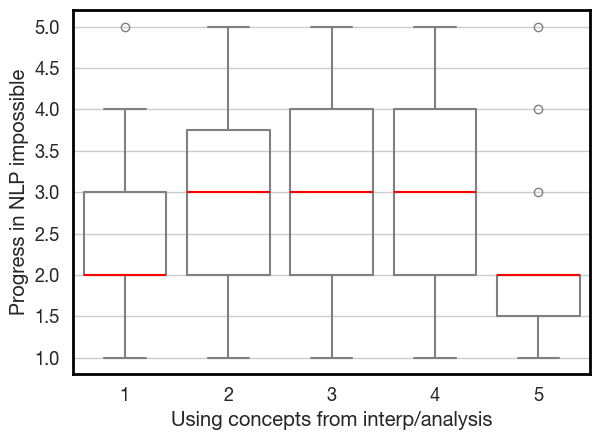

In [226]:
sns.boxplot(df, x='use_of_concepts', y='progress_impossible',
            fill=False,
            medianprops={"color": "red"},color='grey')
# sns.scatterplot(df, x='use_of_concepts', y='progress_impossible', alpha=0.8)
# plt.show()
plt.xlabel('Using concepts from interp/analysis')
plt.ylabel('Progress in NLP impossible')
# plt.xticks([1,2,3,4,5], ['1\n(Strongly disagree)', '2', '3', '4', '5\n(Strongly agree)']) # FIX
plt.tight_layout()
plt.savefig('progress_imposs_concepts.pdf')

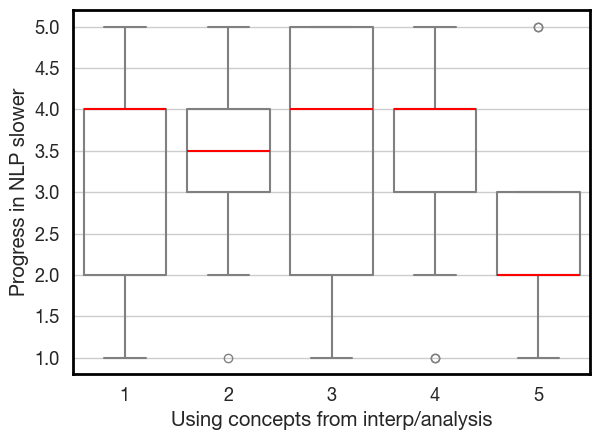

In [227]:
sns.boxplot(df, x='use_of_concepts', y='progress_slower',
            fill=False,
            medianprops={"color": "red"},color='grey')
# sns.stripplot(df, x='reading', y='progress_slower',
#               dodge=True,
#               jitter=True, alpha=0.8)
# plt.show()
plt.xlabel('Using concepts from interp/analysis')
plt.ylabel('Progress in NLP slower')
# plt.xticks([1,2,3,4,5], ['1\n(Strongly disagree)', '2', '3', '4', '5\n(Strongly agree)']) # FIX
plt.tight_layout()
plt.savefig('progress_slower_concepts.pdf')

In [228]:
df['work_on_interp'] = df['research_area'].str.contains('𝗦𝗰𝗶𝗲𝗻𝗰𝗲 𝗼𝗳 𝗟𝗠𝘀')

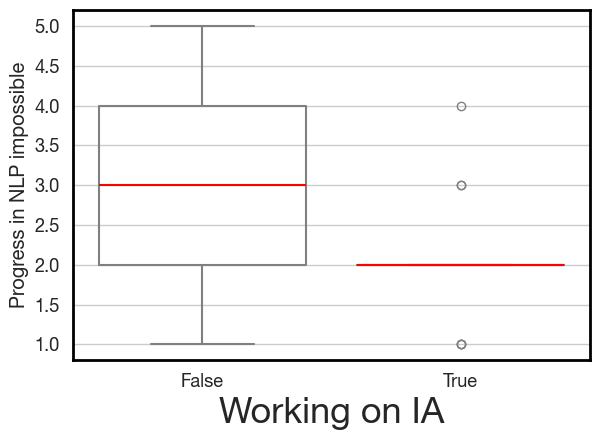

In [229]:
sns.boxplot(df, x='work_on_interp', y='progress_impossible',
            fill=False,
            medianprops={"color": "red"},color='grey')
# sns.stripplot(df, x='reading', y='progress_slower',
#               dodge=True,
#               jitter=True, alpha=0.8)
# plt.show()
plt.xlabel('Working on IA', fontsize=26)
plt.ylabel('Progress in NLP impossible')
plt.tight_layout()
plt.savefig('progress_imposs_work.pdf')

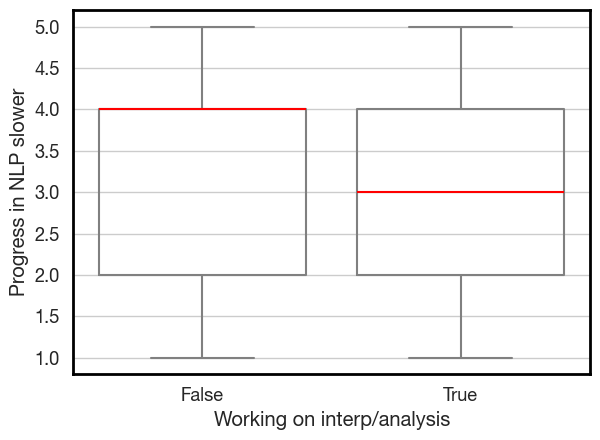

In [230]:
sns.boxplot(df, x='work_on_interp', y='progress_slower',
            fill=False,
            medianprops={"color": "red"},color='grey')
# sns.stripplot(df, x='reading', y='progress_slower',
#               dodge=True,
#               jitter=True, alpha=0.8)
# plt.show()
plt.xlabel('Working on interp/analysis')
plt.ylabel('Progress in NLP slower')
plt.tight_layout()
plt.savefig('progress_slower_work.pdf')

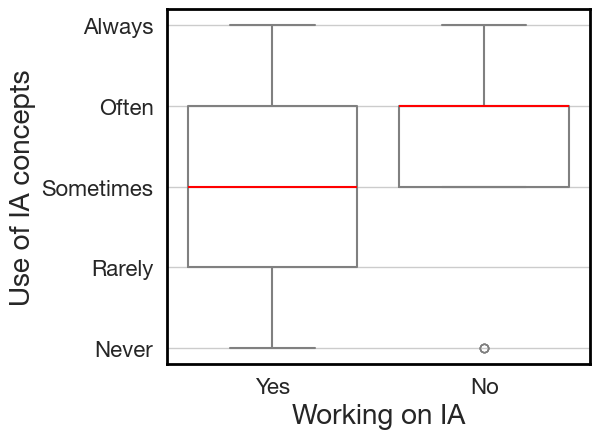

In [231]:
sns.boxplot(df, x='work_on_interp', y='use_of_concepts',
            fill=False,
            medianprops={"color": "red"},color='grey')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
yticks = [1, 2, 3, 4, 5]
yticklabels = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels(yticklabels)

xticks = [False, True]
xticklabels = ['Yes', 'No']
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(xticklabels)

plt.xlabel('Working on IA', fontsize=20)
plt.ylabel('Use of IA concepts', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('concepts_work.pdf')

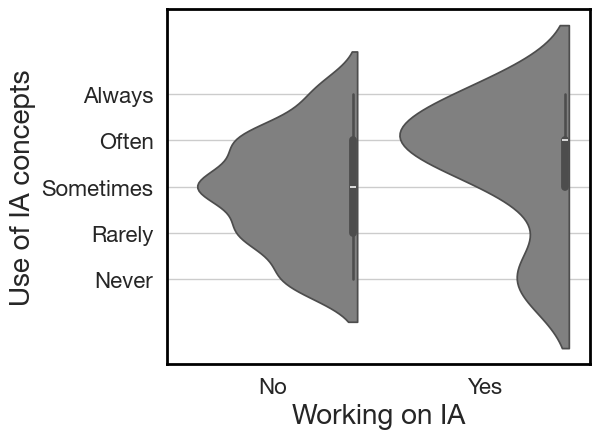

In [232]:
sns.violinplot(df, x='work_on_interp', y='use_of_concepts', color='grey', split=True)

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
yticks = [1, 2, 3, 4, 5]
yticklabels = ['Never', 'Rarely', 'Sometimes', 'Often', 'Always']
plt.gca().set_yticks(yticks)
plt.gca().set_yticklabels(yticklabels)

xticks = [False, True]
xticklabels = ['No', 'Yes']
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(xticklabels)

plt.xlabel('Working on IA', fontsize=20)
plt.ylabel('Use of IA concepts', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('concepts_work.pdf')

plt.show()

In [233]:
df

,timestamp,intro,occupation,research_area,progress_impossible,progress_slower,reading,influence_on_work,paper_titles,use_of_concepts,...,importance_multilingual_low_res,importance_multimodal_grounding,importance_engineering,importance_factuality_reasoning,importance_society_bias,additional_thoughts,whats_missing,why_not_important,name_for_acks,work_on_interp
0,19.03.2024 10:16:33,Yes,Postdoc,𝗟𝗠 𝗮𝗱𝗮𝗽𝘁𝗮𝘁𝗶𝗼𝗻,2,3,4,"It provides me with new research ideas, It cha...",Knowledge is a Region in Weight Space for Fine...,4,...,Model analysis and interpretability research i...,NaN,NaN,Model analysis and interpretability research i...,NaN,A main concern in this form is that it biases ...,"Trajectories, pretraining, role of data on lea...",NaN,Leshem Choshen,False
1,19.03.2024 10:29:03,Yes,PhD student/candidate,𝗦𝗰𝗶𝗲𝗻𝗰𝗲 𝗼𝗳 𝗟𝗠𝘀,2,4,4,"It provides me with new research ideas, It cha...",NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jaap Jumelet,True
2,19.03.2024 10:32:21,Yes,PhD student/candidate,𝗦𝗼𝗰𝗶𝗲𝘁𝗮𝗹 𝗶𝗺𝗽𝗹𝗶𝗰𝗮𝘁𝗶𝗼𝗻𝘀,4,5,4,"It provides me with new research ideas, It hel...",LEASE,4,...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,NaN,Human evaluation of explanations,NaN,NaN,False
3,19.03.2024 10:42:03,Yes,Master's student,𝗟𝗠 𝗮𝗱𝗮𝗽𝘁𝗮𝘁𝗶𝗼𝗻,2,3,4,It provides me with new research ideas,NaN,4,...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,NaN,NaN,NaN,NaN,False
4,19.03.2024 10:59:53,Yes,PhD student/candidate,𝗘𝘃𝗮𝗹𝘂𝗮𝘁𝗶𝗼𝗻 𝗼𝗳 𝗟𝗠𝘀,3,3,5,"It provides me with new research ideas, It add...","https://arxiv.org/pdf/2203.14680.pdf, https://...",4,...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,NaN,Most of model interpretability research is aim...,NaN,Anubrata Das,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,02.05.2024 05:31:50,Yes,PhD student/candidate,𝗦𝗮𝗳𝗲𝘁𝘆,4,5,4,"It provides me with new research ideas, It cha...",NaN,4,...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,NaN,NaN,NaN,Daniel Scalena,False
134,06.05.2024 04:13:13,Yes,PhD student/candidate,𝗟𝗠 𝗮𝗱𝗮𝗽𝘁𝗮𝘁𝗶𝗼𝗻,2,4,2,It changes my mental model of what the capabil...,NaN,1,...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,NaN,NaN,NaN,NaN,False
135,06.05.2024 08:31:45,Yes,Assistant professor,𝗟𝗠 𝗮𝗱𝗮𝗽𝘁𝗮𝘁𝗶𝗼𝗻,3,3,3,"It provides me with new research ideas, It hel...",NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
136,13.05.2024 14:16:26,Yes,PhD student/candidate,𝗟𝗠 𝗮𝗱𝗮𝗽𝘁𝗮𝘁𝗶𝗼𝗻,3,4,3,"It provides me with new research ideas, It hel...","https://arxiv.org/abs/2210.07229, https://arxi...",4,...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,Model analysis and interpretability research i...,NaN,"interpretation of multilingual models, e.g. st...",NaN,Tomasz Limisiewicz,False


/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_99048/2096796597.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=df[column], ax=ax, palette='YlOrBr', order=order, width=1,alpha=1)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_99048/2096796597.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=df[column], ax=ax, palette='YlOrBr', order=order, width=1,alpha=1)
/var/folders/jd/xcxq41xd1bx5jvgpwp14tr940000gn/T/ipykernel_99048/2096796597.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.count

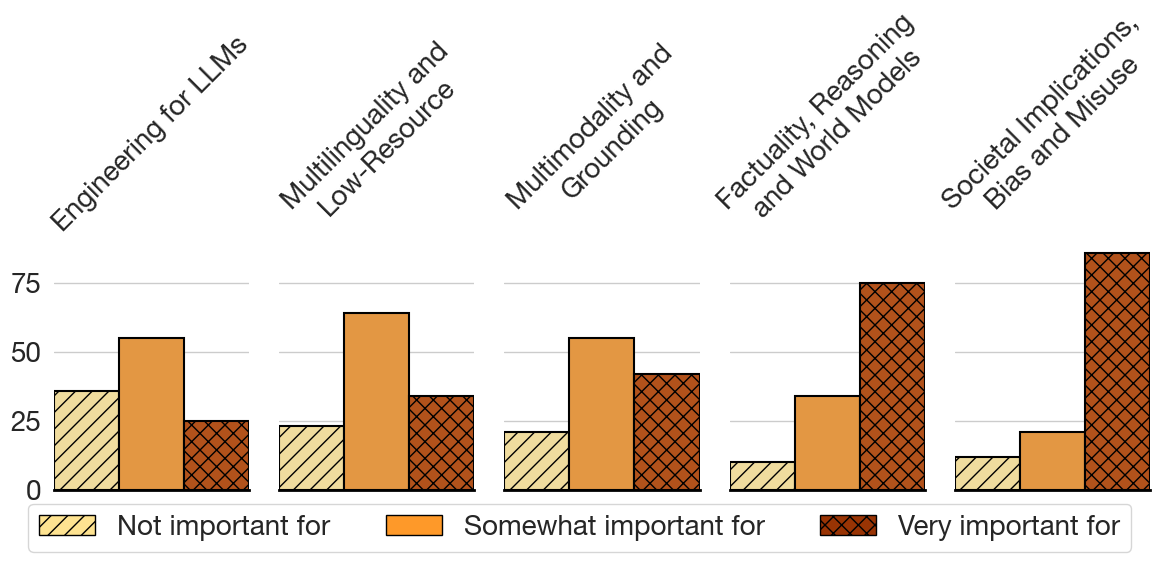

In [264]:
palette = {
    'Model analysis and interpretability research is not important for': '#fee391',
    'Model analysis and interpretability research is somewhat important for': '#fe9929',
    'Model analysis and interpretability research is very important for': '#993404'
}

columns = [
    'importance_engineering',
    'importance_multilingual_low_res',
    'importance_multimodal_grounding',
    'importance_factuality_reasoning',
    'importance_society_bias'
]
titles = [
    'Engineering for LLMs',
    'Multilinguality and\nLow-Resource',
    'Multimodality and\nGrounding',
    'Factuality, Reasoning\nand World Models',
    'Societal Implications,\nBias and Misuse'
]
order = [
    'Model analysis and interpretability research is not important for',
    'Model analysis and interpretability research is somewhat important for',
    'Model analysis and interpretability research is very important for'
]
labels = [
    'Not important for',
    'Somewhat important for',
    'Very important for'
]
hatches = [ '//', '', 'xx']

fig, axes = plt.subplots(1, 5, figsize=(12, 6), sharey=True)
max_count = max(df[column].value_counts().max() for column in columns) + 5

for i, (ax, column, title) in enumerate(zip(axes, columns, titles)):
    bars = sns.countplot(x=df[column], ax=ax, palette='YlOrBr', order=order, width=1,alpha=1)
    for bar, hatch in zip(bars.patches, hatches):
        bar.set_hatch(hatch)
        bar.set_edgecolor('black')
        bar.set_linewidth(1.5)
    ax.set_title(title, fontsize=20, rotation=45)
    ax.set_ylim(0, max_count)
    ax.set_xlabel('')
    ax.tick_params(bottom=False, labelbottom=False)
    ax.set_ylabel('')
    ax.tick_params(axis='y', left=False, labelsize=20)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

from matplotlib.patches import Patch
handles = [Patch(facecolor=palette[label], edgecolor='black', hatch=hatches[i]) for i, label in enumerate(order)]
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.15), ncol=3, fontsize=20)

plt.tight_layout()
fig.subplots_adjust(bottom=0.15)

plt.savefig('importance-for.pdf')

plt.show()

In [235]:
set(df['importance_factuality_reasoning'])

{'Model analysis and interpretability research is not important for',
 'Model analysis and interpretability research is somewhat important for',
 'Model analysis and interpretability research is very important for',
 nan}